In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris, load_wine, load_breast_cancer

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression, SGDRegressor, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import validation_curve
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC #SVM
from sklearn.compose import make_column_transformer,ColumnTransformer

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
import math

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import os

import warnings
warnings.simplefilter('ignore')


## 1. 데이터 불러오기

In [2]:
BASE_DIR = './data'
train_path = os.path.join(BASE_DIR, 'train.csv')
test_path = os.path.join(BASE_DIR, 'test.csv')

In [3]:
data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
target = data['credit']

## 2. 데이터 살펴보기

데이터를 받으면 확인해야할 것

1. 컬럼 별 데이터의 형태 (Type)
2. 데이터 개수 (Shape)
3. 데이터 결측치 (Missing Value) 
4. 데이터 통계값 (Statistics)
5. 데이터의 분포 (Distribution)
6. 데이터의 예외값 (Outlier)

### 2-1. 데이터 대략적으로 이해하기

In [27]:
data.head().T

,0,1,2,3,4
index,0,1,2,3,4
gender,F,F,M,F,F
car,N,N,Y,N,Y
reality,N,Y,Y,Y,Y
child_num,0,1,0,0,0
income_total,202500.0,247500.0,450000.0,202500.0,157500.0
income_type,Commercial associate,Commercial associate,Working,Commercial associate,State servant
edu_type,Higher education,Secondary / secondary special,Higher education,Secondary / secondary special,Higher education
family_type,Married,Civil marriage,Married,Married,Married
house_type,Municipal apartment,House / apartment,House / apartment,House / apartment,House / apartment


- `index`: 인덱스
- `gender`: 성별
- `car`: 차량 소유 여부
- `reality`: 부동산 소유 여부
- `child_num`: 자녀 수
- `income_total`: 연간 소득
- `income_type`: 소득 분류
    - ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- `edu_type`: 교육 수준 
    - ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- `family_type`: 결혼 여부 
    - ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- `house_type`: 생활 방식
    - ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- `DAYS_BIRTH`: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- `DAYS_EMPLOYED`: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- `FLAG_MOBIL`: 핸드폰 소유 여부
- `work_phone`: 업무용 전화 소유 여부
- `phone`: 전화 소유 여부
- `email`: 이메일 소유 여부
- `occyp_type`: 직업 유형													
- `family_size`: 가족 규모
- `begin_month`: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- `credit`: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    - => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [4]:
for dt_idx, dt in zip(data.dtypes.index, data.dtypes) :
    print(dt_idx, dt)

index int64
gender object
car object
reality object
child_num int64
income_total float64
income_type object
edu_type object
family_type object
house_type object
DAYS_BIRTH int64
DAYS_EMPLOYED int64
FLAG_MOBIL int64
work_phone int64
phone int64
email int64
occyp_type object
family_size float64
begin_month float64
credit float64


In [5]:
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t=='O'] 
num_columns = [c for c in data.columns if c not in cat_columns]

print(f'Categorical Columns: \n{cat_columns}\n')
print(f'Numeric Columns: \n{num_columns}\n')

Categorical Columns: 
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

Numeric Columns: 
['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'credit']



In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,26457.0,13228.000000,7637.622372,0.0,6614.0,13228.0,19842.0,26456.0
child_num,26457.0,0.428658,0.747326,0.0,0.0,0.0,1.0,19.0
income_total,26457.0,187306.524493,101878.367995,27000.0,121500.0,157500.0,225000.0,1575000.0
DAYS_BIRTH,26457.0,-15958.053899,4201.589022,-25152.0,-19431.0,-15547.0,-12446.0,-7705.0
DAYS_EMPLOYED,26457.0,59068.750728,137475.427503,-15713.0,-3153.0,-1539.0,-407.0,365243.0
FLAG_MOBIL,26457.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
work_phone,26457.0,0.224742,0.417420,0.0,0.0,0.0,0.0,1.0
phone,26457.0,0.294251,0.455714,0.0,0.0,0.0,1.0,1.0
email,26457.0,0.091280,0.288013,0.0,0.0,0.0,0.0,1.0
family_size,26457.0,2.196848,0.916717,1.0,2.0,2.0,3.0,20.0


In [7]:
data.describe(include='O').T

,count,unique,top,freq
gender,26457,2,F,17697
car,26457,2,N,16410
reality,26457,2,Y,17830
income_type,26457,5,Working,13645
edu_type,26457,5,Secondary / secondary special,17995
family_type,26457,5,Married,18196
house_type,26457,6,House / apartment,23653
occyp_type,18286,18,Laborers,4512


<AxesSubplot:>

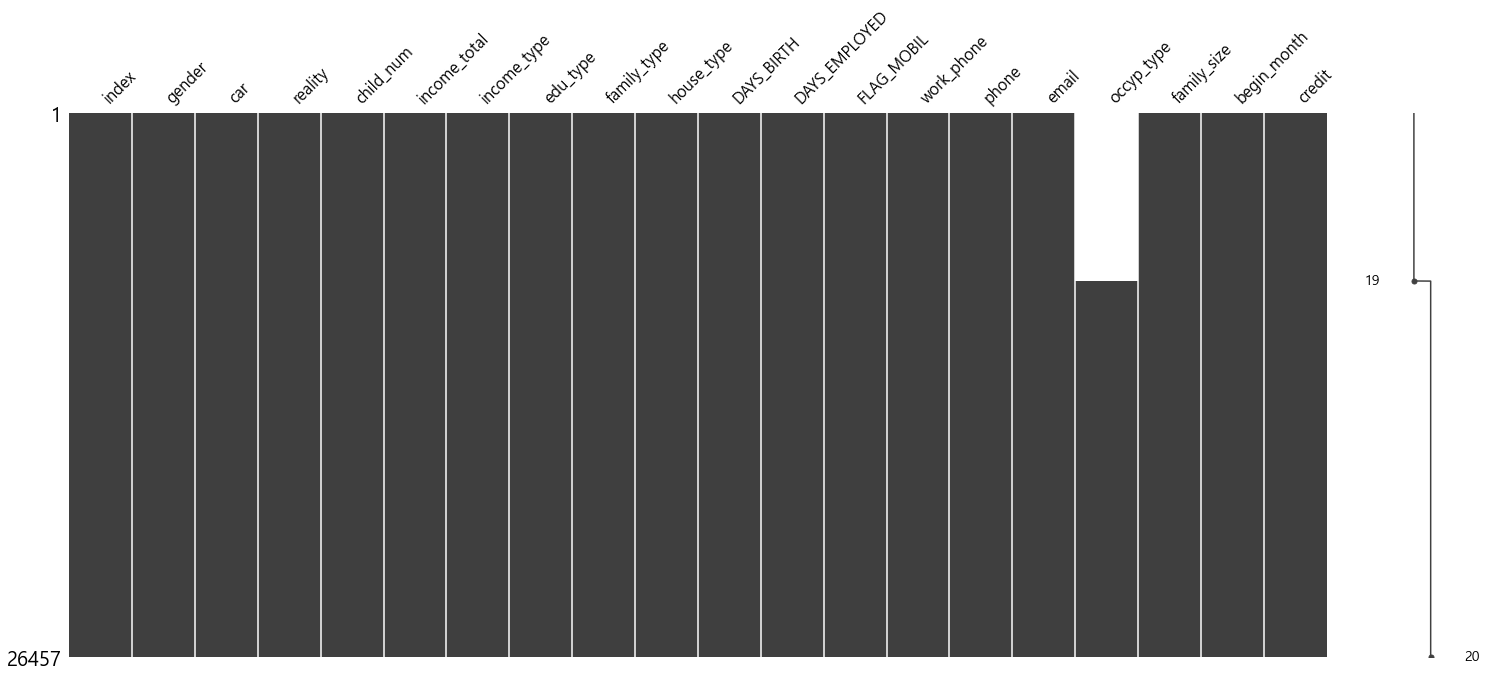

In [32]:
import missingno as msno

msno.matrix(data, sort = 'ascending')

In [33]:
data.isna().sum() / len(data) * 100

index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
dtype: float64

In [8]:
scaler = StandardScaler()
numeric_data = data[num_columns]
scaled_data = scaler.fit_transform(numeric_data)
scaled_data

array([[-1.73198534, -0.5735993 ,  0.1491363 , ..., -0.21473529,
         1.21523077, -0.73983001],
       [-1.73185441,  0.76452932,  0.59084783, ...,  0.87613484,
         1.27562003, -0.73983001],
       [-1.73172348, -0.5735993 ,  2.57854975, ..., -0.21473529,
         0.24900268,  0.68412478],
       ...,
       [ 1.73172348, -0.5735993 ,  1.03255937, ..., -0.21473529,
         0.06783491,  0.68412478],
       [ 1.73185441, -0.5735993 , -0.16006178, ..., -1.30560543,
        -1.98539978,  0.68412478],
       [ 1.73198534, -0.5735993 , -1.04348485, ..., -0.21473529,
         1.034063  ,  0.68412478]])

In [10]:
scaled_data = pd.DataFrame(scaled_data, columns = num_columns)

In [12]:
scaled_data.head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,-1.731985,-0.573599,0.149136,0.490075,-0.463930,0.0,-0.538417,-0.645705,-0.316937,-0.214735,1.215231,-0.739830
1,-1.731854,0.764529,0.590848,1.089621,-0.440878,0.0,-0.538417,-0.645705,3.155199,0.876135,1.275620,-0.739830
2,-1.731723,-0.573599,2.578550,-0.744719,-0.461929,0.0,-0.538417,1.548696,-0.316937,-0.214735,0.249003,0.684125
3,-1.731593,-0.573599,0.149136,0.207081,-0.444893,0.0,-0.538417,1.548696,-0.316937,-0.214735,-0.656836,-2.163785
4,-1.731462,-0.573599,-0.292575,0.219220,-0.444988,0.0,-0.538417,-0.645705,-0.316937,-0.214735,0.007446,0.684125


In [13]:
# 로그 변환
scaled_data['log_income_total'] = np.log(data['income_total'])
# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')

scaled_data['box_cox_income_total'] = trans.fit_transform(data['income_total'].values.reshape(-1, 1))

# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')

scaled_data['yeo_johnson_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))

# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')

scaled_data['quantile_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))

In [14]:
scaled_data

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,log_income_total,box_cox_income_total,yeo_johnson_income_total,quantile_income_total
0,-1.731985,-0.573599,0.149136,0.490075,-0.463930,0.0,-0.538417,-0.645705,-0.316937,-0.214735,1.215231,-0.739830,12.218495,0.419704,0.469909,0.374936
1,-1.731854,0.764529,0.590848,1.089621,-0.440878,0.0,-0.538417,-0.645705,3.155199,0.876135,1.275620,-0.739830,12.419166,0.830609,0.879253,0.858910
2,-1.731723,-0.573599,2.578550,-0.744719,-0.461929,0.0,-0.538417,1.548696,-0.316937,-0.214735,0.249003,0.684125,13.017003,2.028457,1.964264,2.033104
3,-1.731593,-0.573599,0.149136,0.207081,-0.444893,0.0,-0.538417,1.548696,-0.316937,-0.214735,-0.656836,-2.163785,12.218495,0.419704,0.469909,0.374936
4,-1.731462,-0.573599,-0.292575,0.219220,-0.444988,0.0,-0.538417,-0.645705,-0.316937,-0.214735,0.007446,0.684125,11.967181,-0.101283,-0.103179,-0.085414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1.731462,2.102658,0.369992,0.923252,-0.444108,0.0,-0.538417,-0.645705,-0.316937,1.967005,1.456788,-0.739830,12.323856,0.636007,0.689367,0.656486
26453,1.731593,0.764529,-0.071719,0.158765,-0.447679,0.0,-0.538417,-0.645705,-0.316937,-0.214735,-1.260729,0.684125,12.100712,0.176423,0.209137,0.179102
26454,1.731723,-0.573599,1.032559,1.398558,-0.444333,0.0,-0.538417,-0.645705,-0.316937,-0.214735,0.067835,0.684125,12.586220,1.169265,1.197250,1.192071
26455,1.731854,-0.573599,-0.160062,1.383563,-0.430454,0.0,-0.538417,-0.645705,-0.316937,-1.305605,-1.985400,0.684125,12.049419,0.069987,0.090463,0.055229


In [15]:
scaled_data = pd.merge(scaled_data, data[cat_columns],left_index=True, right_index=True, how='left')

In [16]:
# Label Encoding(edu_type)
edu_dict = {'Higher education' : 0,
            'Secondary / secondary special' : 1,
            'Incomplete higher' : 2,
            'Lower secondary' : 3, 
            'Academic degree' : 4}

# data.cp['edu_type'] = data.cp['edu_type'].map(edu_dict)
scaled_data['edu_type'] = scaled_data['edu_type'].map(edu_dict)
# data['edu_type'].apply(lambda x : edu_dict.get(x, -1))

In [17]:
# x_occ = scaled_data[-scaled_data['occyp_type'].isna()]
# y_occ = x_occ[['occyp_type']]
# x_occ = x_occ.drop(['index', 'credit', 'occyp_type'], axis = 1)

# x_target_occ = scaled_data[scaled_data['occyp_type'].isna()]
# y_target_occ = x_target_occ[['occyp_type']]
# x_target_occ = x_target_occ.drop(['index', 'credit', 'occyp_type'], axis = 1)

occyp 라벨링 할 때도 스케일링 먼저 말고 라벨링 먼저 하고 스케일링을 해보자

In [19]:
### occyp 라벨링(knn - 스케일링 먼저한거)

x_occ = scaled_data[-scaled_data['occyp_type'].isna()]
y_occ = x_occ[['occyp_type']]
x_occ = x_occ.drop(['index', 'credit', 'occyp_type'], axis = 1)

x_target_occ = scaled_data[scaled_data['occyp_type'].isna()]
y_target_occ = x_target_occ[['occyp_type']]
x_target_occ = x_target_occ.drop(['index', 'credit', 'occyp_type'], axis = 1)

# knn modeling
ct = make_column_transformer((OneHotEncoder(), 
                              ['gender', 'car', 'reality', 'income_type', 'family_type', 'house_type']),
                              remainder = 'passthrough')
model_knn = make_pipeline( ct, KNeighborsClassifier() )
model_knn.fit(x_occ, y_occ)

y_target_occ['occyp_type'] = model_knn.predict(x_target_occ)

occ_df = pd.merge(y_occ['occyp_type'], y_target_occ['occyp_type'], left_index=True, right_index=True, how='outer')

for i in range(len(occ_df)) :
    if occ_df['occyp_type_x'].isna()[i] :
        occ_df['occyp_type_x'][i] = occ_df['occyp_type_y'][i]
### 인코딩 후 스케일링        
data_cp = data.copy()
data_cp['occyp_type'] = occ_df['occyp_type_x'] 
# Label Encoding(edu_type)
edu_dict = {'Higher education' : 0,
            'Secondary / secondary special' : 1,
            'Incomplete higher' : 2,
            'Lower secondary' : 3, 
            'Academic degree' : 4}

data_cp['edu_type'] = data_cp['edu_type'].map(edu_dict)
# scaled_data['occyp_type'] = occ_df['occyp_type_x'] # occ_df.drop('occyp_type_y', axis = 1)
# scaled_data.T

In [95]:
### occyp 라벨링(스케일링 나중에 한거 - 앙상블 적용(model : knn, logistic, desicion))

data_cp = data.copy()
x_occ = data_cp[-data_cp['occyp_type'].isna()]
y_occ = x_occ[['occyp_type']]
x_occ = x_occ.drop(['index', 'credit', 'occyp_type'], axis = 1)

x_target_occ = data_cp[data_cp['occyp_type'].isna()]
y_target_occ = x_target_occ[['occyp_type']]
x_target_occ = x_target_occ.drop(['index', 'credit', 'occyp_type'], axis = 1)

# encoding
# Label Encoding(edu_type)
edu_dict = {'Higher education' : 0,
            'Secondary / secondary special' : 1,
            'Incomplete higher' : 2,
            'Lower secondary' : 3, 
            'Academic degree' : 4}

x_occ['edu_type'] = x_occ['edu_type'].map(edu_dict)
x_target_occ['edu_type'] = x_target_occ['edu_type'].map(edu_dict)

x_occ = pd.get_dummies(x_occ)
x_target_occ = pd.get_dummies(x_target_occ)

scaler = StandardScaler()
scaled_x_occ = x_occ.copy()
scaled_x_occ = scaler.fit_transform(x_occ)
scaled_x_occ = pd.DataFrame(scaled_x_occ)
scaled_x_occ.columns = x_occ.columns

scaled_x_target_occ = scaler.transform(x_target_occ)
scaled_x_target_occ = pd.DataFrame(scaled_x_target_occ)
scaled_x_target_occ.columns = x_target_occ.columns

## x_occ 변환
# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')
scaled_x_occ['box_cox_income_total'] = trans.fit_transform(x_occ['income_total'].values.reshape(-1, 1))
# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')
scaled_x_occ['yeo_johnson_income_total'] = trans.fit_transform(scaled_x_occ['income_total'].values.reshape(-1, 1))
# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')
scaled_x_occ['quantile_income_total'] = trans.fit_transform(scaled_x_occ['income_total'].values.reshape(-1, 1))

## x_target_occ 변환
# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')
scaled_x_target_occ['box_cox_income_total'] = trans.fit_transform(x_target_occ['income_total'].values.reshape(-1, 1))
# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')
scaled_x_target_occ['yeo_johnson_income_total'] = trans.fit_transform(scaled_x_target_occ['income_total'].values.reshape(-1, 1))
# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')
scaled_x_target_occ['quantile_income_total'] = trans.fit_transform(scaled_x_target_occ['income_total'].values.reshape(-1, 1))

# display(x_occ)
# display(scaled_x_occ)
# display(scaled_x_target_occ.head())

model_logi = LogisticRegression()
model_knn = KNeighborsClassifier()
model_tree = DecisionTreeClassifier()
model_vote = VotingClassifier(estimators = [('logi', model_logi), ('knn', model_knn), ('tree', model_tree)], voting = 'soft')
model_vote.fit(scaled_x_occ, y_occ)
model_vote.predict(scaled_x_target_occ)
y_target_occ['occyp_type'] = model_vote.predict(scaled_x_target_occ)

occ_df = pd.merge(y_occ['occyp_type'], y_target_occ['occyp_type'], left_index=True, right_index=True, how='outer')

for i in range(len(occ_df)) :
    if occ_df['occyp_type_x'].isna()[i] :
        occ_df['occyp_type_x'][i] = occ_df['occyp_type_y'][i]
        
# display(occ_df)



# ct = make_column_transformer((OneHotEncoder(), 
#                               ['gender', 'car', 'reality', 'income_type', 'family_type', 'house_type']),
#                               remainder = 'passthrough')
# model_knn = make_pipeline( ct, KNeighborsClassifier() )
# model_knn.fit(x_occ, y_occ)

# y_target_occ['occyp_type'] = model_knn.predict(x_target_occ)

# occ_df = pd.merge(y_occ['occyp_type'], y_target_occ['occyp_type'], left_index=True, right_index=True, how='outer')

# for i in range(len(occ_df)) :
#     if occ_df['occyp_type_x'].isna()[i] :
#         occ_df['occyp_type_x'][i] = occ_df['occyp_type_y'][i]
### 인코딩 후 스케일링        
data_cp = data.copy()
data_cp['occyp_type'] = occ_df['occyp_type_x'] 
# Label Encoding(edu_type)
edu_dict = {'Higher education' : 0,
            'Secondary / secondary special' : 1,
            'Incomplete higher' : 2,
            'Lower secondary' : 3, 
            'Academic degree' : 4}

data_cp['edu_type'] = data_cp['edu_type'].map(edu_dict)

,occyp_type_x,occyp_type_y
0,High skill tech staff,High skill tech staff
1,Laborers,NaN
2,Managers,NaN
3,Sales staff,NaN
4,Managers,NaN
...,...,...
26452,Core staff,NaN
26453,Managers,Managers
26454,Core staff,NaN
26455,Laborers,NaN


In [96]:
# scaled_data = scaled_data.drop(['credit', 'index'], axis = 1)
data_cp = data_cp.drop(['credit', 'index'], axis = 1)

In [97]:
data_cp

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,F,N,N,0,202500.0,Commercial associate,0,Married,Municipal apartment,-13899,-4709,1,0,0,0,High skill tech staff,2.0,-6.0
1,F,N,Y,1,247500.0,Commercial associate,1,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0
2,M,Y,Y,0,450000.0,Working,0,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0
3,F,N,Y,0,202500.0,Commercial associate,1,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0
4,F,Y,Y,0,157500.0,State servant,0,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,1,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0
26453,F,N,Y,1,180000.0,Working,0,Separated,House / apartment,-15291,-2475,1,0,0,0,Managers,2.0,-47.0
26454,F,Y,N,0,292500.0,Working,1,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0
26455,M,N,Y,0,171000.0,Working,2,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0


In [98]:
data_cp = pd.get_dummies(data_cp)

In [99]:
data_cp

,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,...,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,202500.0,0,-13899,-4709,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,1,247500.0,1,-11380,-1540,1,0,0,1,3.0,...,1,0,0,0,0,0,0,0,0,0
2,0,450000.0,0,-19087,-4434,1,0,1,0,2.0,...,0,0,1,0,0,0,0,0,0,0
3,0,202500.0,1,-15088,-2092,1,0,1,0,2.0,...,0,0,0,0,0,0,1,0,0,0
4,0,157500.0,0,-15037,-2105,1,0,0,0,2.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,2,225000.0,1,-12079,-1984,1,0,0,0,4.0,...,0,0,0,0,0,0,0,0,0,0
26453,1,180000.0,0,-15291,-2475,1,0,0,0,2.0,...,0,0,1,0,0,0,0,0,0,0
26454,0,292500.0,1,-10082,-2015,1,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
26455,0,171000.0,2,-10145,-107,1,0,0,0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [100]:
scaler = StandardScaler()
scaled_data_cp = data_cp
scaled_data_cp = scaler.fit_transform(data_cp)
scaled_data_cp

array([[-0.5735993 ,  0.1491363 , -1.41460268, ..., -0.06578393,
        -0.1922501 , -0.07027017],
       [ 0.76452932,  0.59084783,  0.37629325, ..., -0.06578393,
        -0.1922501 , -0.07027017],
       [-0.5735993 ,  2.57854975, -1.41460268, ..., -0.06578393,
        -0.1922501 , -0.07027017],
       ...,
       [-0.5735993 ,  1.03255937,  0.37629325, ..., -0.06578393,
        -0.1922501 , -0.07027017],
       [-0.5735993 , -0.16006178,  2.16718917, ..., -0.06578393,
        -0.1922501 , -0.07027017],
       [-0.5735993 , -1.04348485,  0.37629325, ..., -0.06578393,
         5.20155781, -0.07027017]])

In [101]:
scaled_data_cp = pd.DataFrame(scaled_data_cp)
scaled_data_cp.columns = data_cp.columns

In [116]:
scaled_data_cp.T

,0,1,2,3,4,5,6,7,8,9,...,26447,26448,26449,26450,26451,26452,26453,26454,26455,26456
child_num,-0.573599,0.764529,-0.573599,-0.573599,-0.573599,2.102658,-0.573599,-0.573599,0.764529,-0.573599,...,2.102658,-0.573599,-0.573599,-0.573599,-0.573599,2.102658,0.764529,-0.573599,-0.573599,-0.573599
income_total,0.149136,0.590848,2.578550,0.149136,-0.292575,0.811704,1.253415,0.811704,-0.071719,-0.822629,...,-0.866800,1.032559,-0.955143,0.369992,0.149136,0.369992,-0.071719,1.032559,-0.160062,-1.043485
edu_type,-1.414603,0.376293,-1.414603,0.376293,-1.414603,0.376293,0.376293,0.376293,-1.414603,0.376293,...,0.376293,-1.414603,0.376293,0.376293,-1.414603,0.376293,-1.414603,0.376293,2.167189,0.376293
DAYS_BIRTH,0.490075,1.089621,-0.744719,0.207081,0.219220,0.605747,-0.383659,0.252779,0.196847,0.041189,...,0.412246,-0.076626,1.299546,1.337627,0.744269,0.923252,0.158765,1.398558,1.383563,-0.859440
DAYS_EMPLOYED,-0.463930,-0.440878,-0.461929,-0.444893,-0.444988,-0.466018,-0.444064,-0.469102,-0.440340,-0.439190,...,-0.437139,-0.436128,-0.447265,-0.433902,-0.435517,-0.444108,-0.447679,-0.444333,-0.430454,-0.437045
FLAG_MOBIL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
work_phone,-0.538417,-0.538417,-0.538417,-0.538417,-0.538417,-0.538417,-0.538417,-0.538417,-0.538417,-0.538417,...,1.857295,-0.538417,1.857295,-0.538417,1.857295,-0.538417,-0.538417,-0.538417,-0.538417,-0.538417
phone,-0.645705,-0.645705,1.548696,1.548696,-0.645705,-0.645705,-0.645705,-0.645705,-0.645705,-0.645705,...,1.548696,-0.645705,1.548696,1.548696,1.548696,-0.645705,-0.645705,-0.645705,-0.645705,-0.645705
email,-0.316937,3.155199,-0.316937,-0.316937,-0.316937,3.155199,3.155199,3.155199,3.155199,-0.316937,...,-0.316937,-0.316937,-0.316937,-0.316937,-0.316937,-0.316937,-0.316937,-0.316937,-0.316937,-0.316937
family_size,-0.214735,0.876135,-0.214735,-0.214735,-0.214735,1.967005,-1.305605,-0.214735,0.876135,-0.214735,...,1.967005,-0.214735,-0.214735,-1.305605,-0.214735,1.967005,-0.214735,-0.214735,-1.305605,-0.214735


In [103]:
# 로그 변환
scaled_data_cp['log_income_total'] = np.log(data_cp['income_total'])

# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')
scaled_data_cp['box_cox_income_total'] = trans.fit_transform(data_cp['income_total'].values.reshape(-1, 1))

# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')
scaled_data_cp['yeo_johnson_income_total'] = trans.fit_transform(scaled_data_cp['income_total'].values.reshape(-1, 1))

# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')
scaled_data_cp['quantile_income_total'] = trans.fit_transform(scaled_data_cp['income_total'].values.reshape(-1, 1))

# scaled_data_cp = pd.merge(scaled_test_data, test_data[cat_columns],left_index=True, right_index=True, how='left')

In [104]:
scaled_data_cp.head()

,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,...,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,log_income_total,box_cox_income_total,yeo_johnson_income_total,quantile_income_total
0,-0.573599,0.149136,-1.414603,0.490075,-0.463930,0.0,-0.538417,-0.645705,-0.316937,-0.214735,...,-0.121679,-0.050009,-0.411232,-0.065784,-0.19225,-0.07027,12.218495,0.419704,0.469909,0.374936
1,0.764529,0.590848,0.376293,1.089621,-0.440878,0.0,-0.538417,-0.645705,3.155199,0.876135,...,-0.121679,-0.050009,-0.411232,-0.065784,-0.19225,-0.07027,12.419166,0.830609,0.879253,0.858910
2,-0.573599,2.578550,-1.414603,-0.744719,-0.461929,0.0,-0.538417,1.548696,-0.316937,-0.214735,...,-0.121679,-0.050009,-0.411232,-0.065784,-0.19225,-0.07027,13.017003,2.028457,1.964264,2.033104
3,-0.573599,0.149136,0.376293,0.207081,-0.444893,0.0,-0.538417,1.548696,-0.316937,-0.214735,...,-0.121679,-0.050009,2.431717,-0.065784,-0.19225,-0.07027,12.218495,0.419704,0.469909,0.374936
4,-0.573599,-0.292575,-1.414603,0.219220,-0.444988,0.0,-0.538417,-0.645705,-0.316937,-0.214735,...,-0.121679,-0.050009,-0.411232,-0.065784,-0.19225,-0.07027,11.967181,-0.101283,-0.103179,-0.085414


In [105]:
# test data
test_data = pd.read_csv(test_path)

cat_columns = [c for c, t in zip(test_data.dtypes.index, data.dtypes) if t=='O'] 
num_columns = [c for c in test_data.columns if c not in cat_columns]
print(cat_columns)
print(num_columns)

scaler = StandardScaler()
numeric_test_data = test_data[num_columns]
scaled_test_data = scaler.fit_transform(numeric_test_data)

scaled_test_data = pd.DataFrame(scaled_test_data, columns = num_columns)

# 로그 변환
scaled_test_data['log_income_total'] = np.log(test_data['income_total'])

# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')
scaled_test_data['box_cox_income_total'] = trans.fit_transform(test_data['income_total'].values.reshape(-1, 1))

# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')
scaled_test_data['yeo_johnson_income_total'] = trans.fit_transform(scaled_test_data['income_total'].values.reshape(-1, 1))

# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')
scaled_test_data['quantile_income_total'] = trans.fit_transform(scaled_test_data['income_total'].values.reshape(-1, 1))

scaled_test_data = pd.merge(scaled_test_data, test_data[cat_columns],left_index=True, right_index=True, how='left')

# Label Encoding(edu_type)
edu_dict = {'Higher education' : 0,
            'Secondary / secondary special' : 1,
            'Incomplete higher' : 2,
            'Lower secondary' : 3, 
            'Academic degree' : 4}

scaled_test_data['edu_type'] = scaled_test_data['edu_type'].map(edu_dict)

x_test_occ = scaled_test_data[-scaled_test_data['occyp_type'].isna()]
y_test_occ = x_test_occ[['occyp_type']]
x_test_occ = x_test_occ.drop(['index', 'occyp_type'], axis = 1)

x_target_test_occ = scaled_test_data[scaled_test_data['occyp_type'].isna()]
y_target_test_occ = x_target_test_occ[['occyp_type']]
x_target_test_occ = x_target_test_occ.drop(['index', 'occyp_type'], axis = 1)

y_target_test_occ['occyp_type'] = model_knn.predict(x_target_test_occ)

occ_test_df = pd.merge(y_test_occ['occyp_type'], y_target_test_occ['occyp_type'], left_index=True, right_index=True, how='outer')

for i in range(len(occ_test_df)) :
    if occ_test_df['occyp_type_x'].isna()[i] :
        occ_test_df['occyp_type_x'][i] = occ_test_df['occyp_type_y'][i]

# scaled_test_data['occyp_type'] = occ_test_df['occyp_type_x']

# scaled_test_data

### 인코딩 후 스케일링        
data_test_cp = test_data.copy()
data_test_cp['occyp_type'] = occ_test_df['occyp_type_x'] 
# Label Encoding(edu_type)
edu_dict = {'Higher education' : 0,
            'Secondary / secondary special' : 1,
            'Incomplete higher' : 2,
            'Lower secondary' : 3, 
            'Academic degree' : 4}

data_test_cp['edu_type'] = data_test_cp['edu_type'].map(edu_dict)
data_test_cp

['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']
['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']


ValueError: could not convert string to float: 'M'

In [125]:
# test data(앙상블)
### occyp 라벨링(스케일링 나중에 한거 - 앙상블 적용(model : knn, logistic, desicion))

test_data = pd.read_csv(test_path)

edu_dict = {'Higher education' : 0,
            'Secondary / secondary special' : 1,
            'Incomplete higher' : 2,
            'Lower secondary' : 3, 
            'Academic degree' : 4}

test_data['edu_type'] = test_data['edu_type'].map(edu_dict)

test_data_occ = test_data[['occyp_type']]
test_data.drop('occyp_type', axis = 1, inplace = True)
test_data = pd.get_dummies(test_data)
test_data = pd.merge(test_data, test_data_occ, left_index=True, right_index=True, how='outer')

x_test_occ = test_data[-test_data['occyp_type'].isna()]
y_test_occ = x_test_occ[['occyp_type']]
x_test_occ = x_test_occ.drop(['index', 'occyp_type'], axis = 1)

x_target_test_occ = test_data[test_data['occyp_type'].isna()]
y_target_test_occ = x_target_test_occ[['occyp_type']]
x_target_test_occ = x_target_test_occ.drop(['index', 'occyp_type'], axis = 1)

# encoding
# # Label Encoding(edu_type)
# edu_dict = {'Higher education' : 0,
#             'Secondary / secondary special' : 1,
#             'Incomplete higher' : 2,
#             'Lower secondary' : 3, 
#             'Academic degree' : 4}

# x_test_occ['edu_type'] = x_test_occ['edu_type'].map(edu_dict)
# x_target_test_occ['edu_type'] = x_target_test_occ['edu_type'].map(edu_dict)

# x_test_occ = pd.get_dummies(x_test_occ)
# x_target_test_occ = pd.get_dummies(x_target_test_occ)

# display(x_test_occ.T)
# display(x_target_test_occ.T)
# display(scaled_x_test_occ)
# display(scaled_x_target_test_occ.head())

scaler = StandardScaler()
scaled_x_test_occ = x_test_occ.copy()
scaled_x_test_occ = scaler.fit_transform(x_test_occ)
scaled_x_test_occ = pd.DataFrame(scaled_x_test_occ)
scaled_x_test_occ.columns = x_test_occ.columns

scaled_x_target_test_occ = scaler.transform(x_target_test_occ)
scaled_x_target_test_occ = pd.DataFrame(scaled_x_target_test_occ)
scaled_x_target_test_occ.columns = x_target_test_occ.columns

## x_occ 변환
# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')
scaled_x_test_occ['box_cox_income_total'] = trans.fit_transform(x_test_occ['income_total'].values.reshape(-1, 1))
# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')
scaled_x_test_occ['yeo_johnson_income_total'] = trans.fit_transform(scaled_x_test_occ['income_total'].values.reshape(-1, 1))
# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')
scaled_x_test_occ['quantile_income_total'] = trans.fit_transform(scaled_x_test_occ['income_total'].values.reshape(-1, 1))

## x_target_occ 변환
# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')
scaled_x_target_test_occ['box_cox_income_total'] = trans.fit_transform(x_target_test_occ['income_total'].values.reshape(-1, 1))
# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')
scaled_x_target_test_occ['yeo_johnson_income_total'] = trans.fit_transform(scaled_x_target_test_occ['income_total'].values.reshape(-1, 1))
# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')
scaled_x_target_test_occ['quantile_income_total'] = trans.fit_transform(scaled_x_target_test_occ['income_total'].values.reshape(-1, 1))

# display(x_test_occ)
# display(scaled_x_test_occ)
# display(scaled_x_target_test_occ.head())

model_logi = LogisticRegression()
model_knn = KNeighborsClassifier()
model_tree = DecisionTreeClassifier()
model_vote = VotingClassifier(estimators = [('logi', model_logi), ('knn', model_knn), ('tree', model_tree)], voting = 'soft')
model_vote.fit(scaled_x_test_occ, y_test_occ)
model_vote.predict(scaled_x_target_test_occ)
y_target_test_occ['occyp_type'] = model_vote.predict(scaled_x_target_test_occ)

occ_test_df = pd.merge(y_test_occ['occyp_type'], y_target_test_occ['occyp_type'], left_index=True, right_index=True, how='outer')

for i in range(len(occ_test_df)) :
    if occ_test_df['occyp_type_x'].isna()[i] :
        occ_test_df['occyp_type_x'][i] = occ_test_df['occyp_type_y'][i]
        

### 인코딩 후 스케일링        
test_data_cp = test_data.copy()
test_data_cp.drop('index', axis = 1, inplace = True)
test_data_cp['occyp_type'] = occ_df['occyp_type_x'] 
test_data_cp = pd.get_dummies(test_data_cp)
test_data_cp_cp = test_data_cp.copy()
scaler = StandardScaler()
test_data_cp = scaler.fit_transform(test_data_cp)
test_data_cp = pd.DataFrame(test_data_cp)
test_data_cp.columns = test_data_cp_cp.columns

## test_data_cp 변환
# 로그 변환
test_data_cp['log_income_total'] = np.log(test_data['income_total'])
# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')
test_data_cp['box_cox_income_total'] = trans.fit_transform(test_data['income_total'].values.reshape(-1, 1))
# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')
test_data_cp['yeo_johnson_income_total'] = trans.fit_transform(test_data_cp['income_total'].values.reshape(-1, 1))
# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')
test_data_cp['quantile_income_total'] = trans.fit_transform(test_data_cp['income_total'].values.reshape(-1, 1))


test_data_cp

,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,...,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,log_income_total,box_cox_income_total,yeo_johnson_income_total,quantile_income_total
0,-0.596243,-0.714468,0.361422,-1.422177,2.211692,0.0,-0.542831,1.541090,-0.305963,-0.225667,...,-0.11959,-0.052032,-0.408486,-0.06798,-0.198204,-0.064163,11.630709,-0.786543,-0.857552,-0.833781
1,-0.596243,-0.492869,-1.400753,-0.701265,-0.495587,0.0,-0.542831,1.541090,-0.305963,-0.225667,...,-0.11959,-0.052032,-0.408486,-0.06798,-0.198204,-0.064163,11.813030,-0.399403,-0.440064,-0.406079
2,-0.596243,-1.139229,0.361422,0.031797,-0.434377,0.0,1.842192,1.541090,-0.305963,-0.225667,...,-0.11959,-0.052032,-0.408486,-0.06798,-0.198204,-0.064163,11.147239,-1.833942,-1.801444,-1.694923
3,-0.596243,-0.714468,0.361422,-0.774166,-0.451131,0.0,1.842192,-0.648891,-0.305963,-0.225667,...,-0.11959,-0.052032,2.448062,-0.06798,-0.198204,-0.064163,11.630709,-0.786543,-0.857552,-0.833781
4,-0.596243,0.393527,-1.400753,-0.429196,-0.500757,0.0,1.842192,-0.648891,-0.305963,-0.225667,...,-0.11959,-0.052032,-0.408486,-0.06798,-0.198204,-0.064163,12.323856,0.662926,0.715321,0.686350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.596243,0.171928,2.123598,-0.612878,-0.472150,0.0,1.842192,1.541090,-0.305963,-0.225667,...,-0.11959,-0.052032,-0.408486,-0.06798,-0.198204,-0.064163,12.218495,0.446480,0.496687,0.437620
9996,-0.596243,0.171928,0.361422,1.223231,-0.442327,0.0,1.842192,-0.648891,-0.305963,-0.225667,...,-0.11959,-0.052032,-0.408486,-0.06798,-0.198204,-0.064163,12.218495,0.446480,0.496687,0.437620
9997,-0.596243,1.058325,0.361422,-1.190132,-0.534302,0.0,-0.542831,-0.648891,-0.305963,-0.225667,...,-0.11959,-0.052032,-0.408486,-0.06798,-0.198204,-0.064163,12.586220,1.195984,1.221837,1.225943
9998,-0.596243,-0.049671,0.361422,-0.124011,-0.440662,0.0,-0.542831,1.541090,-0.305963,-0.225667,...,-0.11959,-0.052032,-0.408486,-0.06798,-0.198204,-0.064163,12.100712,0.202884,0.237157,0.104318


In [56]:
# scaled_test_data = scaled_test_data.drop('index', axis = 1)
data_test_cp = data_test_cp.drop(['index'], axis = 1)

In [57]:
# scaled_test_data
data_test_cp

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,M,Y,N,0,112500.0,Pensioner,1,Civil marriage,House / apartment,-21990,365243,1,0,1,0,Laborers,2.0,-60.0
1,F,N,Y,0,135000.0,State servant,0,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,F,N,Y,0,69372.0,Working,1,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,M,Y,N,0,112500.0,Commercial associate,1,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,F,Y,Y,0,225000.0,State servant,0,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,Y,Y,0,202500.0,Working,2,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0
9996,M,Y,Y,0,202500.0,Working,1,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0
9997,F,N,Y,0,292500.0,Working,1,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0
9998,F,Y,N,0,180000.0,Commercial associate,1,Married,House / apartment,-16541,-1085,1,0,1,0,Sales staff,2.0,-33.0


In [58]:
data_test_cp = pd.get_dummies(data_test_cp)

scaler = StandardScaler()
scaled_data_test_cp = data_test_cp
scaled_data_test_cp = scaler.fit_transform(data_test_cp)

scaled_data_test_cp = pd.DataFrame(scaled_data_test_cp)
scaled_data_test_cp.columns = data_test_cp.columns

# 로그 변환
scaled_data_test_cp['log_income_total'] = np.log(data_test_cp['income_total'])

# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')
scaled_data_test_cp['box_cox_income_total'] = trans.fit_transform(data_test_cp['income_total'].values.reshape(-1, 1))

# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')
scaled_data_test_cp['yeo_johnson_income_total'] = trans.fit_transform(scaled_data_test_cp['income_total'].values.reshape(-1, 1))

# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')
scaled_data_test_cp['quantile_income_total'] = trans.fit_transform(scaled_data_test_cp['income_total'].values.reshape(-1, 1))


In [59]:
scaled_data_test_cp.head()

,child_num,income_total,edu_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,...,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,log_income_total,box_cox_income_total,yeo_johnson_income_total,quantile_income_total
0,-0.596243,-0.714468,0.361422,-1.422177,2.211692,0.0,-0.542831,1.541090,-0.305963,-0.225667,...,-0.113417,-0.050063,-0.384502,-0.08516,-0.167214,-0.078985,11.630709,-0.786543,-0.857552,-0.833781
1,-0.596243,-0.492869,-1.400753,-0.701265,-0.495587,0.0,-0.542831,1.541090,-0.305963,-0.225667,...,-0.113417,-0.050063,-0.384502,-0.08516,-0.167214,-0.078985,11.813030,-0.399403,-0.440064,-0.406079
2,-0.596243,-1.139229,0.361422,0.031797,-0.434377,0.0,1.842192,1.541090,-0.305963,-0.225667,...,-0.113417,-0.050063,-0.384502,-0.08516,-0.167214,-0.078985,11.147239,-1.833942,-1.801444,-1.694923
3,-0.596243,-0.714468,0.361422,-0.774166,-0.451131,0.0,1.842192,-0.648891,-0.305963,-0.225667,...,-0.113417,-0.050063,-0.384502,-0.08516,-0.167214,-0.078985,11.630709,-0.786543,-0.857552,-0.833781
4,-0.596243,0.393527,-1.400753,-0.429196,-0.500757,0.0,1.842192,-0.648891,-0.305963,-0.225667,...,-0.113417,-0.050063,-0.384502,-0.08516,-0.167214,-0.078985,12.323856,0.662926,0.715321,0.686350


In [60]:
# ct = make_column_transformer((OneHotEncoder(), 
#                               ['gender', 'car', 'reality', 'income_type', 'family_type', 'house_type', 'occyp_type']),
#                               remainder = 'passthrough')
# model_dt = make_pipeline( ct, DecisionTreeClassifier(random_state=0, max_depth=3) )
# model_dt.fit(scaled_data, target)
model_dt = DecisionTreeClassifier(random_state=0, max_depth=3)
model_dt.fit(scaled_data_cp, target)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [133]:
models= [('ada',AdaBoostClassifier()),
         ('bc', BaggingClassifier() ),
         ('logi', LogisticRegression() ),
         ('tree',DecisionTreeClassifier(random_state=0, max_depth=3) ),
         ('knn', KNeighborsClassifier() )
        ]

model_vote= VotingClassifier( models , voting = 'soft')
model_vote.fit(scaled_data_cp, target)

VotingClassifier(estimators=[('ada', AdaBoostClassifier()),
                             ('bc', BaggingClassifier()),
                             ('logi', LogisticRegression()),
                             ('tree',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [134]:
result = model_vote.predict_proba(test_data_cp)
result

array([[0.12689744, 0.20501105, 0.66809152],
       [0.13277542, 0.14112351, 0.72610107],
       [0.15250845, 0.22087609, 0.62661546],
       ...,
       [0.12604381, 0.1668623 , 0.70709389],
       [0.23482521, 0.20428074, 0.56089405],
       [0.11673649, 0.30247473, 0.58078878]])

In [65]:
# ct = make_column_transformer((OneHotEncoder(), 
#                               ['gender', 'car', 'reality', 'income_type', 'family_type', 'house_type', 'occyp_type']),
#                               remainder = 'passthrough')
# model_dt = make_pipeline( ct, SVC() )
# model_dt.fit(scaled_data, target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['gender', 'car', 'reality',
                                                   'income_type', 'family_type',
                                                   'house_type',
                                                   'occyp_type'])])),
                ('svc', SVC())])

In [63]:
result = model_dt.predict_proba(scaled_data_test_cp)
result

array([[0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844],
       ...,
       [0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844]])

In [64]:
answer = pd.read_csv(os.path.join(BASE_DIR, 'sample_submission.csv'))
answer.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


In [135]:
answer['0'] = result[:, 0]
answer['1'] = result[:, 1]
answer['2'] = result[:, 2]
answer.head(50)

,index,0,1,2
0,26457,0.126897,0.205011,0.668092
1,26458,0.132775,0.141124,0.726101
2,26459,0.152508,0.220876,0.626615
3,26460,0.144756,0.151959,0.703285
4,26461,0.133879,0.275793,0.590328
5,26462,0.157791,0.266089,0.576119
6,26463,0.180671,0.505051,0.314278
7,26464,0.242261,0.293447,0.464292
8,26465,0.135138,0.189363,0.675499
9,26466,0.144591,0.208861,0.646548


In [136]:
answer.to_csv('test20210727_ensemble.csv', index=False)

In [121]:
np.log(test_data['income_total'])

0       11.630709
1       11.813030
2       11.147239
3       11.630709
4       12.323856
          ...    
9995    12.218495
9996    12.218495
9997    12.586220
9998    12.100712
9999    12.506177
Name: income_total, Length: 10000, dtype: float64

In [123]:
test_data_cp

array([[-0.59624306, -0.71446815,  0.36142218, ..., -0.06797983,
        -0.19820437, -0.06416291],
       [-0.59624306, -0.49286906, -1.40075326, ..., -0.06797983,
        -0.19820437, -0.06416291],
       [-0.59624306, -1.13922928,  0.36142218, ..., -0.06797983,
        -0.19820437, -0.06416291],
       ...,
       [-0.59624306,  1.05832457,  0.36142218, ..., -0.06797983,
        -0.19820437, -0.06416291],
       [-0.59624306, -0.04967088,  0.36142218, ..., -0.06797983,
        -0.19820437, -0.06416291],
       [-0.59624306,  0.83672548, -1.40075326, ..., -0.06797983,
        -0.19820437, -0.06416291]])